In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans

SEED=90089

In [2]:
# Read Data
patient_df = pd.read_csv('../data/hyperglycemic_patients.csv')

#Print shape and data preview
print("Dataframe shape:   ", patient_df.shape)
print("Dataframe Features:", patient_df.columns)
patient_df.head()

Dataframe shape:    (13424, 17)
Dataframe Features: Index(['glucose_max', 'anchor_age', 'dod', 'gender', 'dbp_mean', 'sbp_mean',
       'glucose_mean', 'heart_rate_mean', 'spo2_mean', 'resp_rate_mean',
       'temperature_mean', 'apsiii', 'glucose_score', 'los', 'avg_bmi_value',
       'avg_sofa', 'admission_type'],
      dtype='object')


,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,los,avg_bmi_value,avg_sofa,admission_type
0,277.0,36,0,0,64.320000,112.880000,221.272727,101.800000,92.000000,17.346154,37.186250,38,3,1.938414,26.750000,3.0,OBSERVATION ADMIT
1,2340.0,35,0,0,77.769231,122.961538,468.592593,105.361111,96.093023,19.813953,36.727586,87,5,4.472905,30.558477,7.0,EW EMER.
2,259.0,19,1,1,49.300000,74.200000,259.000000,89.750000,70.000000,26.333333,31.900000,88,3,0.309664,30.558477,10.0,EW EMER.
3,406.0,24,0,0,57.333333,92.848485,292.000000,86.631579,96.162162,15.289474,33.590000,150,5,17.513646,30.558477,13.0,EW EMER.
4,398.0,31,0,0,78.600000,133.800000,285.000000,100.826087,90.304348,25.173913,36.593333,34,5,2.794167,30.558477,1.0,EW EMER.


### Data cleaning

In [3]:
patient_df.describe()

,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,los,avg_bmi_value,avg_sofa
count,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000,13424.000000
mean,316.103844,63.682881,0.495456,0.461636,63.363922,119.960557,271.306614,87.653014,96.793039,19.845181,36.804286,55.162694,3.560265,3.854448,30.590579,5.644741
std,176.410287,16.021267,0.499998,0.498545,11.375989,17.671564,2997.899035,16.170529,2.689682,4.001272,0.626871,22.569107,0.931029,4.633404,37.526241,3.606541
min,200.000000,18.000000,0.000000,0.000000,17.000000,50.863636,42.000000,28.500000,51.250000,9.960000,30.666667,12.000000,3.000000,0.016979,3.400000,1.000000
25%,222.000000,54.000000,0.000000,0.000000,55.463599,107.073413,166.915000,76.124053,95.636364,16.962963,36.580000,39.000000,3.000000,1.249392,26.203846,3.000000
50%,259.000000,65.000000,0.000000,0.000000,62.500000,117.500000,197.333333,86.737986,97.153846,19.267262,36.806458,50.000000,3.000000,2.194572,30.558477,5.000000
75%,333.000000,76.000000,1.000000,1.000000,70.036786,131.091991,233.000000,98.447917,98.500000,22.160000,37.083333,67.000000,5.000000,4.353024,30.558477,8.000000
max,5840.000000,91.000000,1.000000,1.000000,126.458333,217.750000,166855.166667,166.307692,100.000000,40.880000,39.950000,167.000000,9.000000,39.965972,2332.250000,15.000000


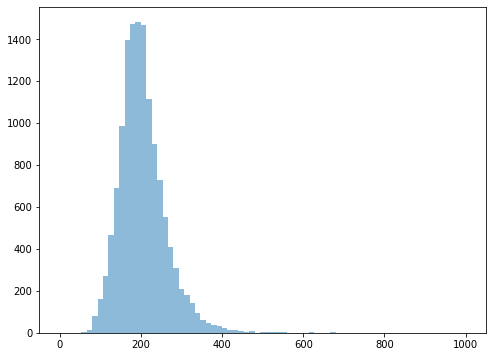

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(patient_df.glucose_mean, bins=75, alpha=0.5, range=(0,1000))
plt.show()

In [5]:
# Filter dataset hard code
patient_df = patient_df[(patient_df.glucose_max < 1000) & (patient_df.glucose_mean < 500)].reset_index(drop=True)
print("Dataframe shape:   ", patient_df.shape)


Dataframe shape:    (13243, 17)


In [6]:
patient_df

,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,los,avg_bmi_value,avg_sofa,admission_type
0,277.0,36,0,0,64.320000,112.880000,221.272727,101.800000,92.000000,17.346154,37.186250,38,3,1.938414,26.750000,3.0,OBSERVATION ADMIT
1,259.0,19,1,1,49.300000,74.200000,259.000000,89.750000,70.000000,26.333333,31.900000,88,3,0.309664,30.558477,10.0,EW EMER.
2,406.0,24,0,0,57.333333,92.848485,292.000000,86.631579,96.162162,15.289474,33.590000,150,5,17.513646,30.558477,13.0,EW EMER.
3,398.0,31,0,0,78.600000,133.800000,285.000000,100.826087,90.304348,25.173913,36.593333,34,5,2.794167,30.558477,1.0,EW EMER.
4,487.0,34,0,1,107.062500,164.437500,235.777778,77.000000,99.250000,25.053571,33.001250,91,5,9.107917,23.400000,14.0,URGENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,249.0,91,1,1,44.482143,106.544643,218.000000,56.702703,99.896552,15.378378,31.600000,119,3,5.811019,30.558477,7.0,EW EMER.
13239,265.0,91,1,0,55.280000,137.200000,203.000000,60.769231,99.800000,15.700000,37.008571,86,3,14.010266,30.558477,7.0,EW EMER.
13240,253.0,91,1,0,46.357143,104.750000,232.400000,71.296296,99.925926,18.370370,35.839091,48,3,2.198727,31.072549,6.0,EW EMER.
13241,417.0,91,1,1,73.181818,120.318182,111.600000,88.565217,99.954545,15.687500,37.156000,26,5,0.921701,30.558477,2.0,EW EMER.


### Assign labels to `los` based on `>3Days` and `>7days` inspired based-on prev. researches:

for reference, see [Wang, S., McDermott, M.B., Chauhan, G., Ghassemi, M., Hughes, M.C. and Naumann, T., 2020, April. Mimic-extract: A data extraction, preprocessing, and representation pipeline for mimic-iii. In Proceedings of the ACM conference on health, inference, and learning (pp. 222-235).](https://arxiv.org/pdf/1907.08322v2.pdf)

`los` data was very right-skewed from the `exploratory_data_analysis.ipynb` from `visualizations`. 

In [7]:
labelled_patient_df = patient_df.copy()
label_lst = []
for idx, row in labelled_patient_df.iterrows():
    if row['los'] >= 7: 
        label_lst.append(2)
    elif row['los'] > 3:
        label_lst.append(1)
    else:
        label_lst.append(0)


labelled_patient_df['label'] = pd.Series(label_lst)

In [8]:
print("Label Distribution", dict(labelled_patient_df.label.value_counts()))

Label Distribution {0: 8229, 1: 3178, 2: 1836}


### One-hot Encode on `addmission_type`

In [15]:
labelled_patient_df['admission_type']= labelled_patient_df['admission_type'].astype('category')

labelled_patient_df = pd.concat([labelled_patient_df, 
                                pd.get_dummies(labelled_patient_df['admission_type'])],
                                axis=1)
labelled_patient_df.head()

,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,...,label,AMBULATORY OBSERVATION,DIRECT EMER.,DIRECT OBSERVATION,ELECTIVE,EU OBSERVATION,EW EMER.,OBSERVATION ADMIT,SURGICAL SAME DAY ADMISSION,URGENT
0,277.0,36,0,0,64.320000,112.880000,221.272727,101.800000,92.000000,17.346154,...,0,0,0,0,0,0,0,1,0,0
1,259.0,19,1,1,49.300000,74.200000,259.000000,89.750000,70.000000,26.333333,...,0,0,0,0,0,0,1,0,0,0
2,406.0,24,0,0,57.333333,92.848485,292.000000,86.631579,96.162162,15.289474,...,2,0,0,0,0,0,1,0,0,0
3,398.0,31,0,0,78.600000,133.800000,285.000000,100.826087,90.304348,25.173913,...,0,0,0,0,0,0,1,0,0,0
4,487.0,34,0,1,107.062500,164.437500,235.777778,77.000000,99.250000,25.053571,...,2,0,0,0,0,0,0,0,0,1


### Log Transformation

In [17]:
labelled_patient_df[['spo2_mean', 'resp_rate_mean', 'glucose_score', 'avg_sofa']] = np.log10(labelled_patient_df[['spo2_mean', 'resp_rate_mean', 'glucose_score', 'avg_sofa']])

In [18]:
labelled_patient_df[['spo2_mean', 'resp_rate_mean', 'glucose_score', 'avg_sofa']].head()

,spo2_mean,resp_rate_mean,glucose_score,avg_sofa
0,1.963788,1.239203,0.477121,0.477121
1,1.845098,1.420506,0.477121,1.000000
2,1.983004,1.184393,0.698970,1.113943
3,1.955709,1.400951,0.698970,0.000000
4,1.996731,1.398870,0.698970,1.146128


In [19]:
# Export label data to csv
labelled_patient_df.to_csv('../data/hyperglycemic_patients_w_bin_categories.csv')

In [78]:
# # Data split
# X = label_df.loc[:, label_df.columns != 'label']
# y = label_df.loc[:, label_df.columns == 'label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89)
# X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=89)